# Physical example: Two masses and three strings

Assume two masses (with mass $M_1, M_2$) are hung  by three connected strings of length $L_1, L_2, L_3$. The system is in equilibrium. 

The systems is indicated in the following figure ![Physical System](PhysicalExample.png)

We have in total nine equations, that describes the relation between tension, length, and angle.

$-T_1\cos\theta_1+T_2\cos\theta_2=0$ 

$T_1\sin\theta_1-T_2\sin\theta_2-W_1=0$

$-T_2\cos\theta_2+T_3\cos\theta_3=0$ 

$T_2\sin\theta_2+T_3\sin\theta_3-W_2=0$

$L_1\cos\theta_1+L_2\cos\theta_2+L_3\cos\theta_3-L=0$

$-L_1\sin\theta_1-L_2\sin\theta_2+L_3\sin\theta_3=0$  

$\sin^2\theta_1+\cos^2\theta_1-1=0$. 

$\sin^2\theta_2+\cos^2\theta_2-1=0$. 

$\sin^2\theta_3+\cos^2\theta_3-1=0$. 


Let us write these as nine coupled equations, call our function $f$ with unknown x (also 9-dimensional vector)

$f(x) = 0$  
where the column vector is 
$x  = \begin{pmatrix}x_0 \\ 
x_1 \\ 
x_2 \\ 
x_3 \\ 
x_4 \\ 
x_5 \\ 
x_6 \\ 
x_7 \\ 
x_8  \end{pmatrix}=\begin{pmatrix}\sin\theta_1 \\ 
\sin\theta_2 \\ 
\sin\theta_3 \\ 
\cos\theta_1 \\ 
\cos\theta_2 \\ 
\cos\theta_3 \\ 
T_1 \\ 
T_2 \\ 
T_3  \end{pmatrix}$

And the lengths and weights can be put in another column vector

$L =\begin{pmatrix}L \\ L_1\\ L_2\\ L_3\end{pmatrix}$, and the weights $W =\begin{pmatrix}W_1 \\ W_2\end{pmatrix}$


Using these new definitions we can rewrite our equation as 

$-x_6x_3+x_7x_4=0$ 

$x_6x_0-x_7x_1-W_1=0$

$-x_7x_4+x_8x_5=0$ 

$x_7x_1+x_8x_2-W_2=0$

$L_1x_3+L_2x_4+L_3x_5-L=0$

$-L_1x_0-L_2x_1+L_3x_2=0$  

$x_0^2+x^2_3-1=0$. 

$x_1^2+x^2_4-1=0$. 

$x_2^2+x^2_5-1=0$. 

## Find root?

Problem $f(x)=0$. The solution can be obtained Newton-Raphson algorithm

$J(x)\Delta(x)=-f(x)$ and $x\leftarrow x+\Delta x$

In [35]:
# Given parameters
import numpy as np
W = np.array([10, 25])
L = np.array([9, 3, 5, 4 ])

def func_masses(X,L,W):
    return np.array ([-x[6]*x[3]+x[7]*x[4],
                     x[6]*x[0]-x[7]*x[1]-W[0],
                     -x[7]*x[4]+x[8]*x[5],
                     x[7]*x[1]+x[8]*x[2]-W[1],
                     L[1]*x[3]+L[2]*x[4]+L[3]*x[5]-L[0],
                     -L[1]*x[0]-L[2]*x[1]+L[3]*x[2],
                     x[0]**2 + x[3]**2-1,
                     x[1]**2 + x[4]**2-1,
                    x[2]**2 + x[5]**2-1,
                     ])

def func_LW(X, L=L,W=W):
    return func_masses(X,L,W)

In [36]:
# Initial values

x0 = np.array([1.5,.5,.5,.5,.5,.5,1,1,1])

# Visualizing the result

In [37]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def plot_masses(x,L,W,**kwargs):
    kwargs.setdefault('linestyle','-')
    kwargs.setdefault('marker','o')
    kwargs.setdefault('linewidth',1)
    
    ax = kwargs.pop('ax', None)
    if ax is None:
        ax=plt.subplot(111)# play with this number change it
        
    r0 = np.array([0,0])
    r1 = r0 + np.array([L[0],0])
    rod = np.transpose([r0,r1])
    
    L1 = r0 + np.array([L[1]*x[3],-L[1]*x[0]])
    L2 = L1 + np.array([L[2]*x[4],-L[2]*x[1]])
    L3 = L2 + np.array([L[3]*x[5],L[3]*x[2]])
    
    string = np.transpose([r0,L1,L2,L3])
    
    ax.plot(rod[0],rod[1], color="black", marker="d", linewidth=3)
    ax.plot(string[0],string[1], **kwargs)
    ax.set_aspect(1)
    return ax

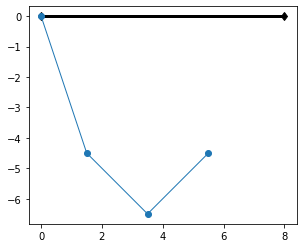

In [34]:
plot_masses(x0,L,W)